# Machine Learning Pipeline with Python

#Problem Statement: Finding High Quality Wines for Mr John

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
source = "wine_quality.csv"
wine_data = pd.read_csv(source, delimiter=";")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
###Reviewing the qualities of the wine

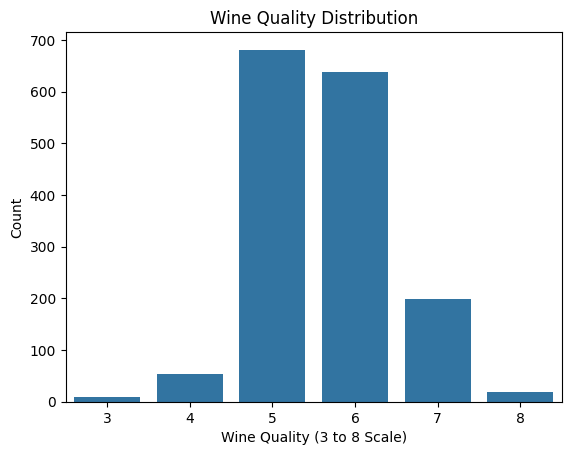

In [ ]:
sns.countplot(x="quality",data=wine_data)
plt.title("Wine Quality Distribution")
plt.xlabel('Wine Quality (3 to 8 Scale)')
plt.ylabel('Count')
plt.show()

In [ ]:
#From the bar graph, there are mostly 5 and 6 quality scale of wine.
#Reading the wine quality scale. Low quality (<=5), good quality (=6), high quality (>=7).

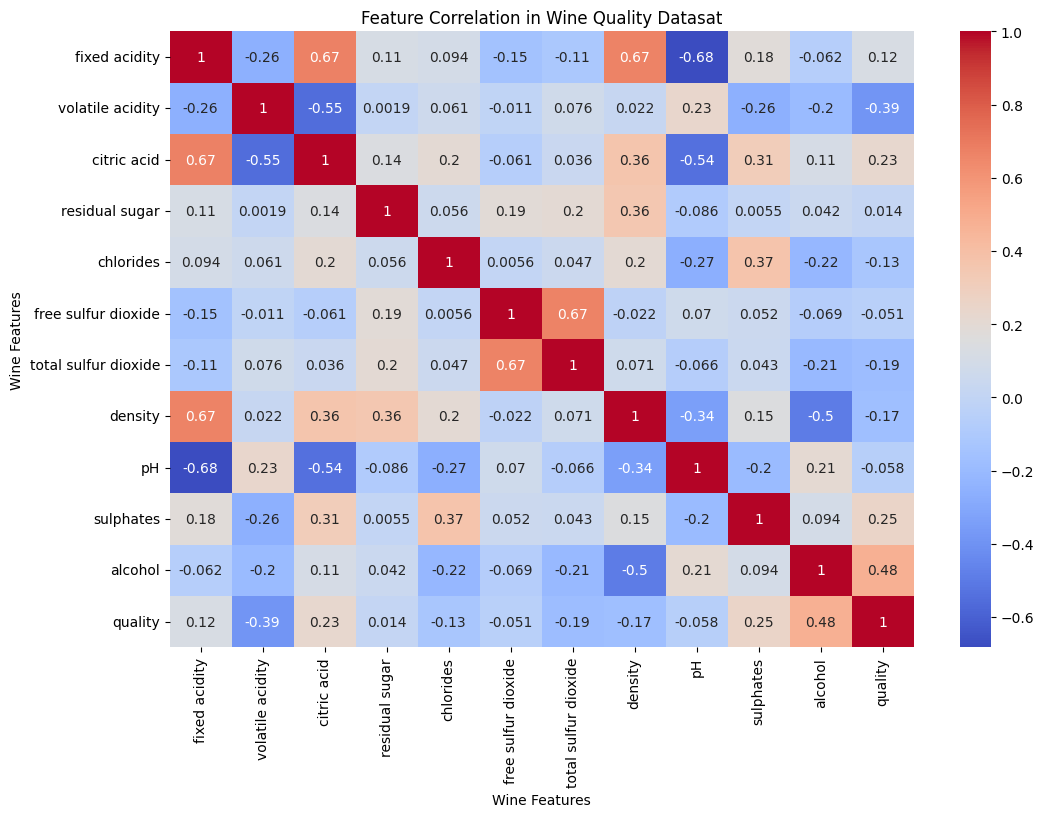

In [ ]:
#Relations between Categorises
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation in Wine Quality Datasat')
plt.xlabel('Wine Features')
plt.ylabel('Wine Features')
plt.show()

In [ ]:
#The map illustrates the features correlating to another feature.

##Legend
# Red being highly(positive) correlated,
# Grey being possibly(neutral) correlated
# Blue being lowly/not(negatively) correlated

In [ ]:
wine_data['quality_binary'] = (wine_data['quality'] > 5 ).astype(int)
wine_data = wine_data.drop(columns=['quality'])

In [ ]:
X = wine_data.drop(columns=['quality_binary'])
Y = wine_data['quality_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Training data shape: {X_test.shape}")

Training data shape: (1279, 11)
Training data shape: (320, 11)


In [ ]:
train_test_df = pd.DataFrame({
    'Set':['Training'] * len(y_train) + ['Testing'] * len(y_test),
    'Target': pd.concat([y_train, y_test])
})

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


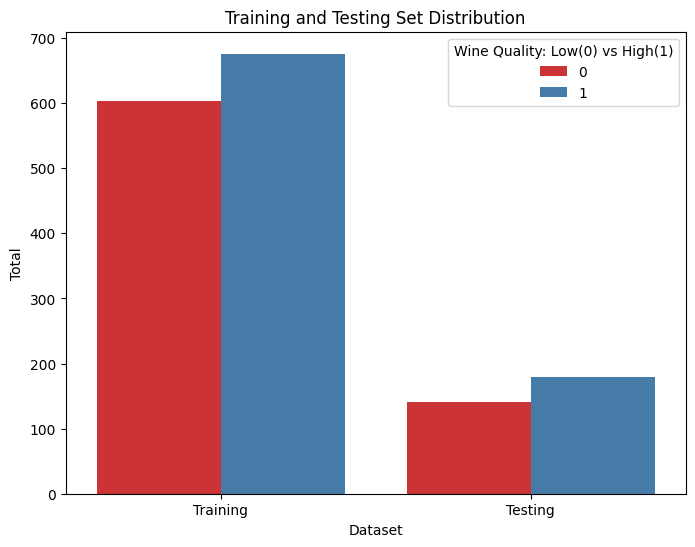

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Set', hue='Target', data=train_test_df, palette='Set1')
plt.title('Training and Testing Set Distribution')
plt.xlabel('Dataset')
plt.ylabel('Total')
plt.legend(title='Wine Quality: Low(0) vs High(1)')

In [ ]:
#There is more high quality wine compared to low quality wine.

## Before Scaling

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

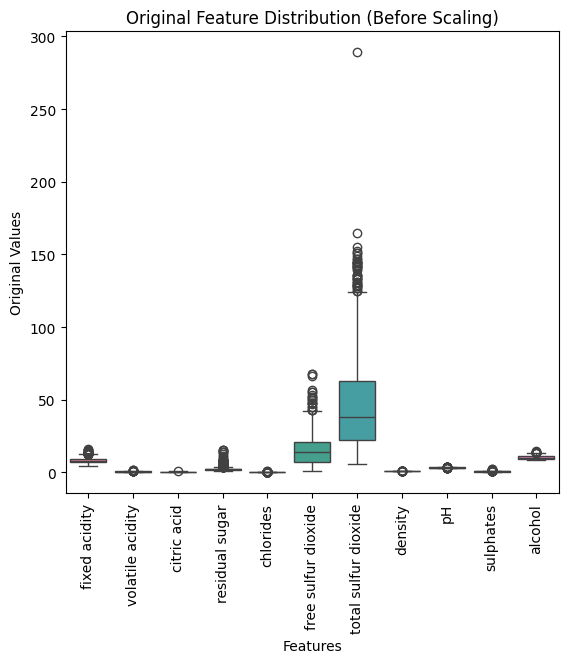

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Original Feature Distribution (Before Scaling)')
plt.xlabel('Features')
plt.ylabel('Original Values')

#changes the x value illustration in the graph to horizontaly written
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=90)

plt.show()

In [ ]:
###Before scaling, unreadable data visualisations

In [ ]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## After Scaling

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

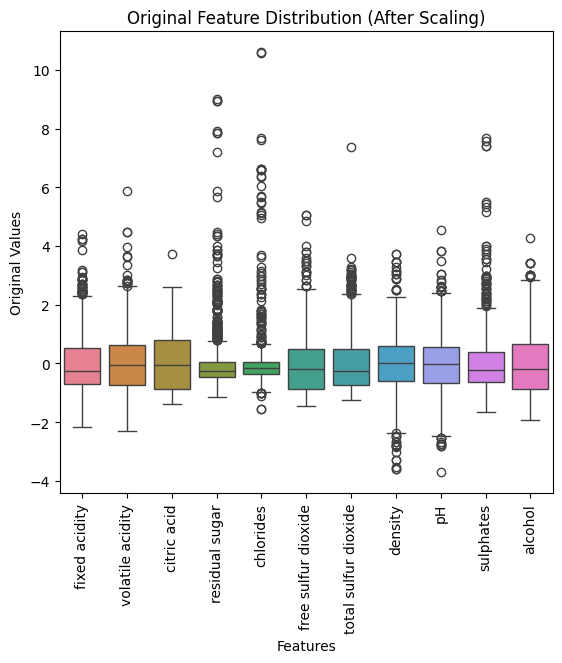

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=X_train_scaled)
plt.title('Original Feature Distribution (After Scaling)')
plt.xlabel('Features')
plt.ylabel('Original Values')

#changes the x value illustration in the graph to horizontaly written
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=90)
                              #X_train_scaled is not used as it is not a numpy, but df

plt.show()

In [ ]:
#After scaling, scattered box plot is readable

In [ ]:
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5);
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled);

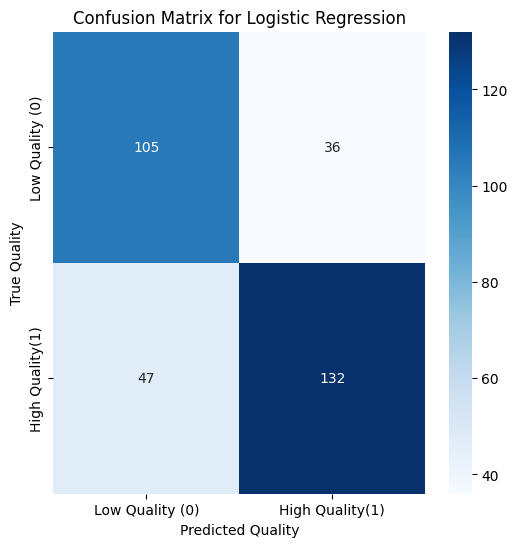

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.xticks([0.5,1.5], ['Low Quality (0)', 'High Quality(1)'])
plt.yticks([0.5,1.5], ['Low Quality (0)', 'High Quality(1)'])
plt.show()

2 values from trained data; High or Low Quality
If the predicted quality matches with true quality results, means it has predicted correctly.
From the graph,
There was a total of 132 correctly predicted (true positive) results for being high quality,
105 correctly predicted (true negative) results for being low quality wines.

There were 47 false negative results of being low quality, but is actually high quality,
36 false positive results of being high quality, but is actually low quality

## K-Nearest Neighbour

In [ ]:
#KNN Categorical Data Visualisation
knn_params = {'n_neighbors': [3,5,7,9]}

knn_clf = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)

In [ ]:
#Fit the model
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)

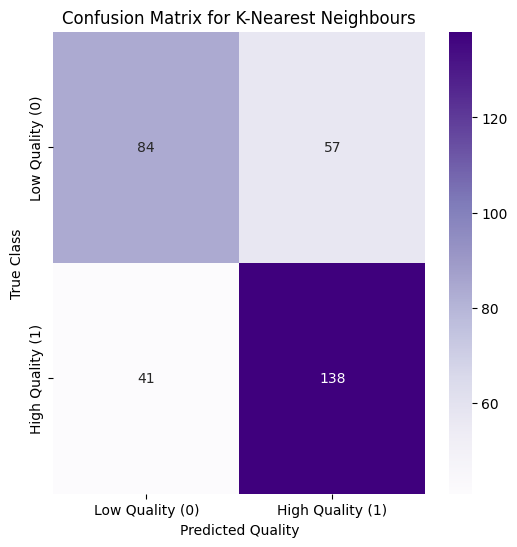

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')

#Graph Legends
plt.title('Confusion Matrix for K-Nearest Neighbours')
plt.xlabel('Predicted Quality')
plt.ylabel('True Class')

#Customize x-axis ticks
plt.xticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])
plt.yticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])

plt.show()

Identify how close each model is to nearing to the true value.

For larger dataset, the processing of using KNN will take a long time.

In [ ]:
#Depth of Decision Tree
dt_params = {'max_depth': [None, 5, 10, 20]}

In [ ]:
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

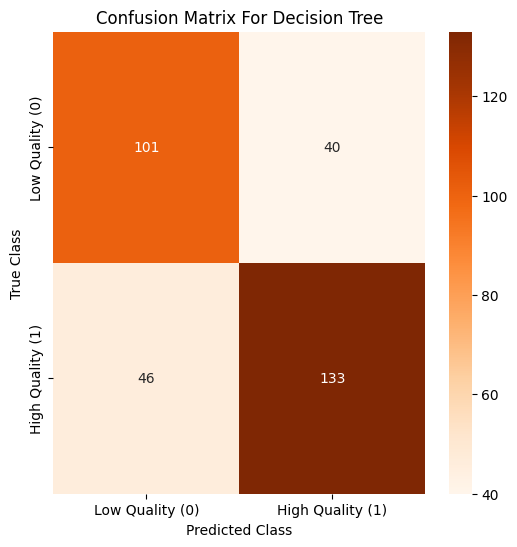

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix For Decision Tree')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.xticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])
plt.yticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])

plt.show()

**Drawbacks of Decision Trees**

Unstable changes in data - When there are small changes are made in dataset, the whole graph is affected.

## Random Forest

In [ ]:
#Random Forest
rf_params = {'n_estimators':[50,100,200], 'max_depth': [None, 10, 20, 30]}

In [ ]:
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

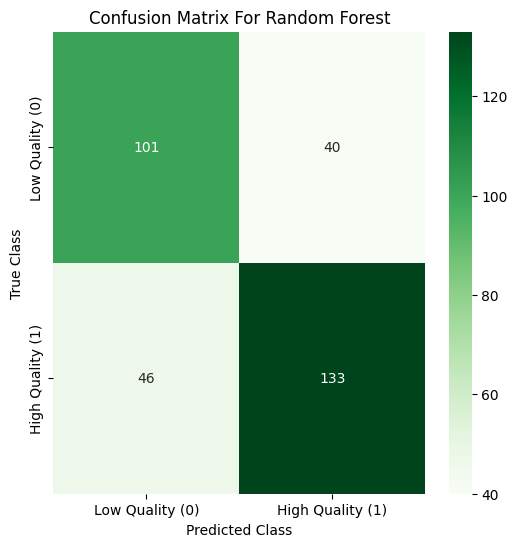

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')

plt.title('Confusion Matrix For Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.xticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])
plt.yticks([0.5,1.5], ['Low Quality (0)','High Quality (1)'])

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
model_names = ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest']

In [ ]:
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
]

precisions = [
    precision_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf),
]

recalls = [
    recall_score(y_test, y_pred_log_reg),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf),
]

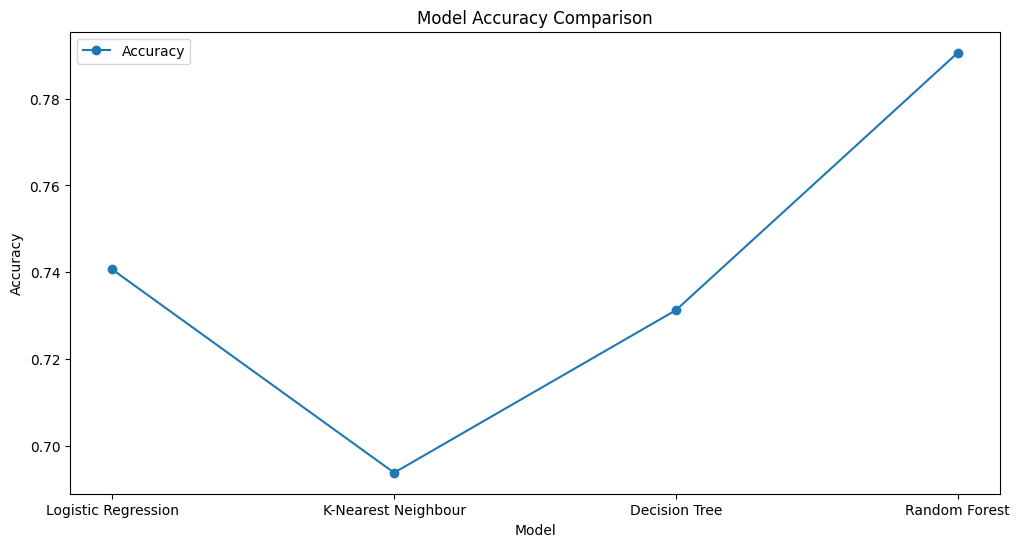

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(model_names, accuracies, marker='o', label='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Precision vs Recall Comparison of Models

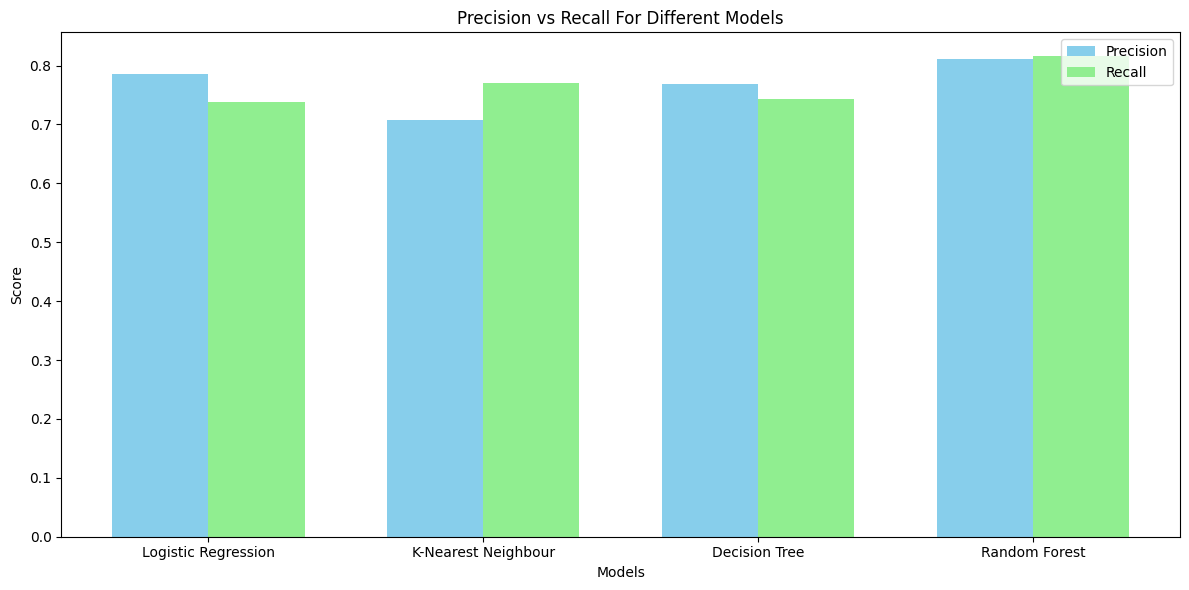

In [62]:
plt.figure(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(model_names))

#Plotting Precision
plt.bar(index, precisions, bar_width, label='Precision', color='skyblue')
plt.bar(index + bar_width, recalls, bar_width, label='Recall', color='lightgreen')

plt.title('Precision vs Recall For Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(index + bar_width/2, model_names)
plt.legend()
plt.tight_layout()
plt.show()